## Data Preprocessing

In [288]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [205]:
# Run the data preprocessing notebook
data = pd.read_csv('docs/anxiety_attack_dataset.csv')

In [207]:
# There are not duplicated rows in the dataset
data.duplicated().value_counts()

False    12000
Name: count, dtype: int64

In [209]:
# There are not Na's in the data
for column in data:
    print(data[column].isna().value_counts())
    print(" ")


ID
False    12000
Name: count, dtype: int64
 
Age
False    12000
Name: count, dtype: int64
 
Gender
False    12000
Name: count, dtype: int64
 
Occupation
False    12000
Name: count, dtype: int64
 
Sleep Hours
False    12000
Name: count, dtype: int64
 
Physical Activity (hrs/week)
False    12000
Name: count, dtype: int64
 
Caffeine Intake (mg/day)
False    12000
Name: count, dtype: int64
 
Alcohol Consumption (drinks/week)
False    12000
Name: count, dtype: int64
 
Smoking
False    12000
Name: count, dtype: int64
 
Family History of Anxiety
False    12000
Name: count, dtype: int64
 
Stress Level (1-10)
False    12000
Name: count, dtype: int64
 
Heart Rate (bpm during attack)
False    12000
Name: count, dtype: int64
 
Breathing Rate (breaths/min)
False    12000
Name: count, dtype: int64
 
Sweating Level (1-5)
False    12000
Name: count, dtype: int64
 
Dizziness
False    12000
Name: count, dtype: int64
 
Medication
False    12000
Name: count, dtype: int64
 
Therapy Sessions (per month)
Fa

#### Diego's preprocessing

In [212]:
# Dizinness (Yes/No)
print("We replace the values of the Dizziness feature with 1 for Yes and 0 for No")
data['Dizziness'] = data['Dizziness'].replace('Yes', 1)
data['Dizziness'] = data['Dizziness'].replace('No', 0)

# Obviously, there are no outliers for this feature, nor there is need for normalization

# Check for class imbalance
print(" ")
print("Class imbalance for the Dizziness feature")
print(data['Dizziness'].value_counts(normalize=True))
print("We can see that the classes are more or less balanced")

We replace the values of the Dizziness feature with 1 for Yes and 0 for No
 
Class imbalance for the Dizziness feature
Dizziness
0    0.7005
1    0.2995
Name: proportion, dtype: float64
We can see that the classes are more or less balanced


In [214]:
# Medication (Yes(No)
print("We replace the values of the Medication feature with 1 for Yes and 0 for No")
data['Medication'] = data['Medication'].replace('Yes', 1)
data['Medication'] = data['Medication'].replace('No', 0)

# Obviously, there are no outliers for this feature, nor there is need for normalization

# Check for class imbalance
print(" ")
print("Class imbalance for the Medication feature")
print(data['Medication'].value_counts(normalize=True))
print("We can see that the classes are more or less balanced")

We replace the values of the Medication feature with 1 for Yes and 0 for No
 
Class imbalance for the Medication feature
Medication
0    0.800417
1    0.199583
Name: proportion, dtype: float64
We can see that the classes are more or less balanced


The distribution of the Therapy Sessions (per month) feature
count    12000.000000
mean         4.518417
std          2.866010
min          0.000000
25%          2.000000
50%          5.000000
75%          7.000000
max          9.000000
Name: Therapy Sessions (per month), dtype: float64
 
We check for outliers in the Therapy Sessions (per month) feature


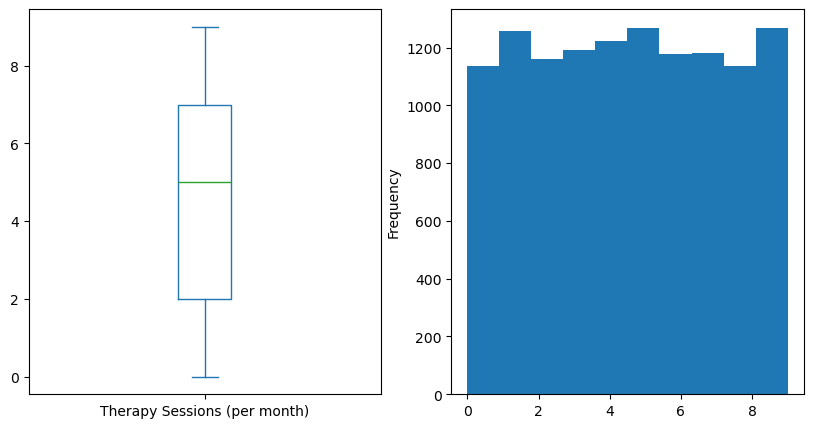

2.0
7.0


In [216]:
# Therapy Sessions (per month) (numerical variable)
# We check the distribution of the variable
print("The distribution of the Therapy Sessions (per month) feature")
print(data['Therapy Sessions (per month)'].describe())

# Check outliers
print(" ")
print("We check for outliers in the Therapy Sessions (per month) feature")

# boxplot and histogram 
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
data['Therapy Sessions (per month)'].plot(kind='box')
plt.subplot(1, 2, 2)
data['Therapy Sessions (per month)'].plot(kind='hist')
plt.show()

print(data['Therapy Sessions (per month)'].quantile(0.25))
print(data['Therapy Sessions (per month)'].quantile(0.75))

# There are no outliers in the Therapy Sessions (per month) feature

# Normalize the variable
data['Therapy Sessions (per month)'] = (data['Therapy Sessions (per month)'] - data['Therapy Sessions (per month)'].mean()) / data['Therapy Sessions (per month)'].std()

In [217]:
# Recent Major Life Event (Yes/No)
print("We replace the values of the Recent Major Life Event feature with 1 for Yes and 0 for No")
data['Recent Major Life Event'] = data['Recent Major Life Event'].replace('Yes', 1)
data['Recent Major Life Event'] = data['Recent Major Life Event'].replace('No', 0)

# Obviously, there are no outliers for this feature, nor there is need for normalization

# Check for class imbalance
print(" ")
print("Class imbalance for the Recent Major Life Event feature")
print(data['Recent Major Life Event'].value_counts(normalize=True))
print("We can see that the classes are more or less balanced")

We replace the values of the Recent Major Life Event feature with 1 for Yes and 0 for No
 
Class imbalance for the Recent Major Life Event feature
Recent Major Life Event
0    0.7545
1    0.2455
Name: proportion, dtype: float64
We can see that the classes are more or less balanced


In [218]:
# Diet quality (1-10) (Numerical variable)
# We check the distribution of the variable
print("The distribution of the Diet quality (1-10) feature")
print(data['Diet Quality (1-10)'].describe())

# There are no outliers in the Diet Quality (1-10) feature since all values go from 1 to 10

# Check class imbalance
print(" ")
print("We check for class imbalance in the Diet Quality (1-10) feature")
print(data['Diet Quality (1-10)'].value_counts(normalize=True))
print("We can see that the classes are completely balanced")

# Normalize the variable
data['Diet Quality (1-10)'] = (data['Diet Quality (1-10)'] - data['Diet Quality (1-10)'].mean()) / data['Diet Quality (1-10)'].std()

The distribution of the Diet quality (1-10) feature
count    12000.000000
mean         5.497333
std          2.867579
min          1.000000
25%          3.000000
50%          5.000000
75%          8.000000
max         10.000000
Name: Diet Quality (1-10), dtype: float64
 
We check for class imbalance in the Diet Quality (1-10) feature
Diet Quality (1-10)
2     0.103667
5     0.102417
3     0.102083
6     0.101500
10    0.101250
8     0.099000
9     0.098417
7     0.098167
4     0.097250
1     0.096250
Name: proportion, dtype: float64
We can see that the classes are completely balanced


#### Daniel's preprocessing

Occupation, Caffeine Intake (mg/day), Alcohol Consumption (drinks/week), Smoking

###### ocupation

In [225]:
# Display all unique values in the 'Occupation' column
print("Unique occupations in the dataset:")
unique_occupations = data['Occupation'].unique()
print(unique_occupations)

# Apply one-hot encoding to the 'Occupation' column
# One-hot encoding converts categorical data into binary columns for each category.
encoder = OneHotEncoder(sparse_output=False, drop='first') 
occupation_encoded = encoder.fit_transform(data[['Occupation']])

#Create a DataFrame for the encoded occupation data
encoded_columns = encoder.get_feature_names_out(['Occupation'])
occupation_df = pd.DataFrame(occupation_encoded, columns=encoded_columns)

# Add the encoded columns back to the original dataset and drop the original column
data = pd.concat([data, occupation_df], axis=1)
data.drop(columns=['Occupation'], inplace=True)

# Display the updated dataset structure
print("\nUpdated dataset with encoded 'Occupation'")
#print(data.head())

Unique occupations in the dataset:
['Other' 'Teacher' 'Doctor' 'Student' 'Unemployed' 'Engineer']

Updated dataset with encoded 'Occupation'


###### smoking

In [228]:
# Check for class imbalance in categorical columns (e.g., Smoking)
print("Class distribution for 'Smoking':")
print(data['Smoking'].value_counts(normalize=True))  # Percentage distribution
# Map 'Smoking' values to binary integers
data['Smoking'] = data['Smoking'].map({'Yes': 1, 'No': 0})

Class distribution for 'Smoking':
Smoking
No     0.701417
Yes    0.298583
Name: proportion, dtype: float64


###### Caffeine Intake and Alcohol Consumption

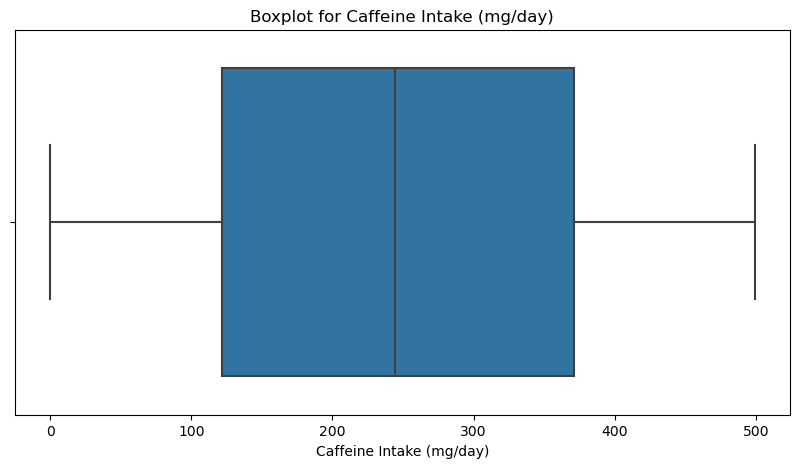

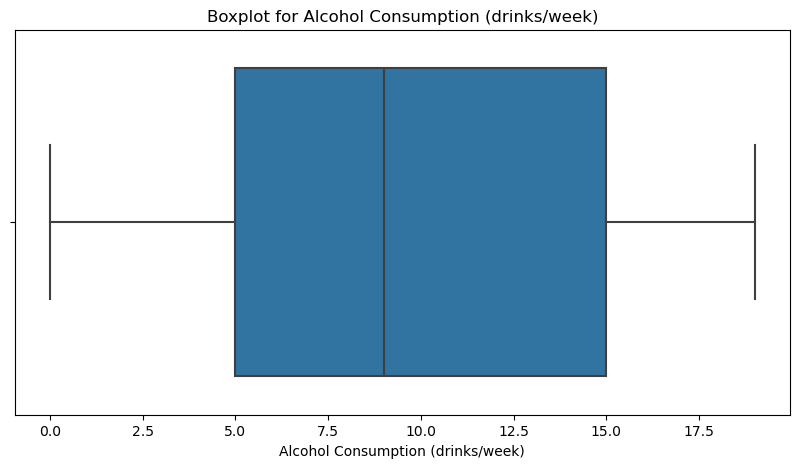

Number of outliers in 'Caffeine Intake': 0
Number of outliers in 'Alcohol Consumption': 0
Normalized data:
   Caffeine Intake (normalized)  Alcohol Consumption (normalized)
0                     -0.496232                         -0.605436
1                     -1.036095                         -0.605436
2                      1.524795                          0.781257
3                      1.552480                          1.127930
4                      0.811898                         -1.298782


In [231]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for Caffeine Intake
plt.figure(figsize=(10, 5))
sns.boxplot(x=data['Caffeine Intake (mg/day)'])
plt.title('Boxplot for Caffeine Intake (mg/day)')
plt.show()

# Boxplot for Alcohol Consumption
plt.figure(figsize=(10, 5))
sns.boxplot(x=data['Alcohol Consumption (drinks/week)'])
plt.title('Boxplot for Alcohol Consumption (drinks/week)')
plt.show()

# Detect outliers using IQR
def detect_outliers(column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

caffeine_outliers = detect_outliers('Caffeine Intake (mg/day)')
alcohol_outliers = detect_outliers('Alcohol Consumption (drinks/week)')

print(f"Number of outliers in 'Caffeine Intake': {len(caffeine_outliers)}")
print(f"Number of outliers in 'Alcohol Consumption': {len(alcohol_outliers)}")


# Initialize scaler
scaler = StandardScaler()

# Normalize Caffeine Intake
data['Caffeine Intake (normalized)'] = scaler.fit_transform(data[['Caffeine Intake (mg/day)']])

# Normalize Alcohol Consumption
data['Alcohol Consumption (normalized)'] = scaler.fit_transform(data[['Alcohol Consumption (drinks/week)']])

# Drop original columns if needed
data.drop(columns=['Caffeine Intake (mg/day)', 'Alcohol Consumption (drinks/week)'], inplace=True)

print("Normalized data:")
print(data[['Caffeine Intake (normalized)', 'Alcohol Consumption (normalized)']].head())



## Fabian's Processing

###### Age

In [234]:
Age = data['Age']
bins= [0,18,30,40,50,60,70]
groups = pd.cut(Age,bins)
groups.value_counts()
groups.describe

# One hot-encoding
ohe = OneHotEncoder(sparse_output=False).set_output(transform='pandas')
array = ohe.fit_transform(groups.to_frame())
data = pd.concat([data,array], axis=1)
data.head()

,ID,Age,Gender,Sleep Hours,Physical Activity (hrs/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm during attack),Breathing Rate (breaths/min),...,Occupation_Teacher,Occupation_Unemployed,Caffeine Intake (normalized),Alcohol Consumption (normalized),"Age_(0, 18]","Age_(18, 30]","Age_(30, 40]","Age_(40, 50]","Age_(50, 60]","Age_(60, 70]"
0,1,56,Female,9.6,8.3,0,No,4,145,33,...,0.0,0.0,-0.496232,-0.605436,0.0,0.0,0.0,0.0,1.0,0.0
1,2,46,Male,6.4,7.3,0,No,3,143,18,...,1.0,0.0,-1.036095,-0.605436,0.0,0.0,0.0,1.0,0.0,0.0
2,3,32,Female,6.9,1.0,0,No,2,60,34,...,0.0,0.0,1.524795,0.781257,0.0,0.0,1.0,0.0,0.0,0.0
3,4,60,Male,9.2,3.7,0,Yes,6,94,19,...,0.0,0.0,1.552480,1.127930,0.0,0.0,0.0,0.0,1.0,0.0
4,5,25,Male,9.2,2.5,0,Yes,7,152,15,...,0.0,0.0,0.811898,-1.298782,0.0,1.0,0.0,0.0,0.0,0.0


###### Gender

In [238]:
Gender = data['Gender']
# One hot-encoding
ohe = OneHotEncoder(sparse_output=False).set_output(transform='pandas')
array = ohe.fit_transform(data[['Gender']])
data = pd.concat([data,array], axis=1)
data.head()

,ID,Age,Gender,Sleep Hours,Physical Activity (hrs/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm during attack),Breathing Rate (breaths/min),...,Alcohol Consumption (normalized),"Age_(0, 18]","Age_(18, 30]","Age_(30, 40]","Age_(40, 50]","Age_(50, 60]","Age_(60, 70]",Gender_Female,Gender_Male,Gender_Other
0,1,56,Female,9.6,8.3,0,No,4,145,33,...,-0.605436,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,2,46,Male,6.4,7.3,0,No,3,143,18,...,-0.605436,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,3,32,Female,6.9,1.0,0,No,2,60,34,...,0.781257,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4,60,Male,9.2,3.7,0,Yes,6,94,19,...,1.127930,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,5,25,Male,9.2,2.5,0,Yes,7,152,15,...,-1.298782,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [240]:
###### Sleep Hours

,ID,Age,Gender,Sleep Hours,Physical Activity (hrs/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm during attack),Breathing Rate (breaths/min),...,"Age_(0, 18]","Age_(18, 30]","Age_(30, 40]","Age_(40, 50]","Age_(50, 60]","Age_(60, 70]",Gender_Female,Gender_Male,Gender_Other,Norm Sleep hr
0,1,56,Female,9.6,8.3,0,No,4,145,33,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.942857
1,2,46,Male,6.4,7.3,0,No,3,143,18,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.485714
2,3,32,Female,6.9,1.0,0,No,2,60,34,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.557143
3,4,60,Male,9.2,3.7,0,Yes,6,94,19,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.885714
4,5,25,Male,9.2,2.5,0,Yes,7,152,15,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.885714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,28,Male,4.4,4.1,1,Yes,1,139,20,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.200000
11996,11997,49,Female,9.9,2.2,0,Yes,4,150,33,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.985714
11997,11998,23,Female,9.8,8.1,1,No,2,81,33,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.971429
11998,11999,52,Male,5.9,6.6,0,No,9,90,14,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.414286


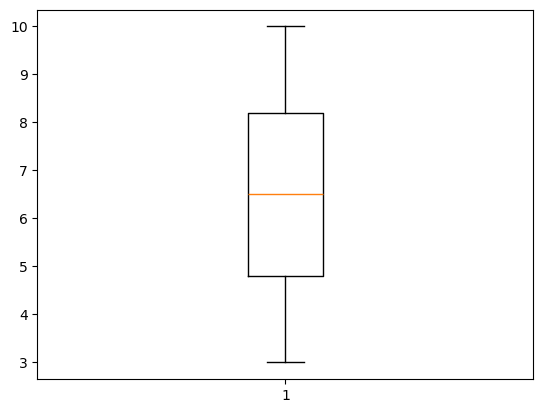

In [242]:
sleep = data['Sleep Hours']
plt.boxplot(sleep)
# no outliers then proceed to normalize
min_max = MinMaxScaler().set_output(transform='pandas')
normSleep = min_max.fit_transform(sleep.values.reshape(-1, 1))
normSleep = normSleep.rename(columns={normSleep.columns[0]: 'Norm Sleep hr'})
data = pd.concat([data, normSleep], axis=1)
data

In [244]:
###### Physical Activity (hrs/week)

,ID,Age,Gender,Sleep Hours,Physical Activity (hrs/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm during attack),Breathing Rate (breaths/min),...,"Age_(18, 30]","Age_(30, 40]","Age_(40, 50]","Age_(50, 60]","Age_(60, 70]",Gender_Female,Gender_Male,Gender_Other,Norm Sleep hr,Norm Activity hrs/week
0,1,56,Female,9.6,8.3,0,No,4,145,33,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.942857,0.83
1,2,46,Male,6.4,7.3,0,No,3,143,18,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.485714,0.73
2,3,32,Female,6.9,1.0,0,No,2,60,34,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.557143,0.10
3,4,60,Male,9.2,3.7,0,Yes,6,94,19,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.885714,0.37
4,5,25,Male,9.2,2.5,0,Yes,7,152,15,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.885714,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,28,Male,4.4,4.1,1,Yes,1,139,20,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.200000,0.41
11996,11997,49,Female,9.9,2.2,0,Yes,4,150,33,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.985714,0.22
11997,11998,23,Female,9.8,8.1,1,No,2,81,33,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.971429,0.81
11998,11999,52,Male,5.9,6.6,0,No,9,90,14,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.414286,0.66


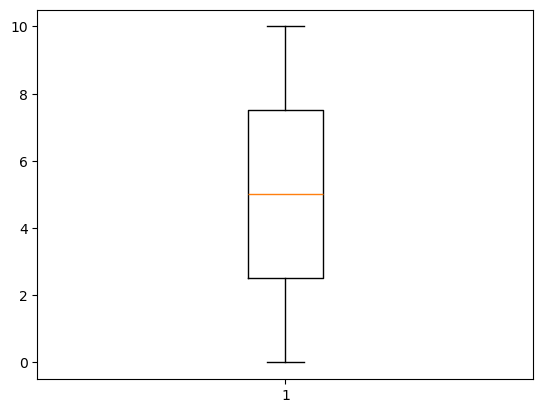

In [246]:
activity = data['Physical Activity (hrs/week)']
plt.boxplot(activity)
# no outliers then proceed to normalize
min_max = MinMaxScaler().set_output(transform='pandas')
normActivity = min_max.fit_transform(activity.values.reshape(-1, 1))
normActivity = normActivity.rename(columns={normActivity.columns[0]: 'Norm Activity hrs/week'})
data = pd.concat([data, normActivity], axis=1)
data

## Jorge Hernaez

In [249]:
# Family History of Anxiety (Yes/No)
print("We replace the values of the Family History of Anxiety feature with 1 for Yes and 0 for No")
# Simpler way to convert Yes/No to 1/0
data["Family History of Anxiety"] = data["Family History of Anxiety"].map({"Yes": 1, "No": 0})

# Obviously, there are no outliers for this feature, nor there is need for normalization

# Check for class imbalance
print("\n Class imbalance for the Dizziness feature")
print(data["Family History of Anxiety"].value_counts(normalize=True))
print("We can see that the classes are more or less balanced")

We replace the values of the Family History of Anxiety feature with 1 for Yes and 0 for No

 Class imbalance for the Dizziness feature
Family History of Anxiety
0    0.59825
1    0.40175
Name: proportion, dtype: float64
We can see that the classes are more or less balanced


In [251]:
# Stress Level (1-10) (Numerical variable)
# We check the distribution of the variable
print("The distribution of the Stress Level (1-10) feature")
print(data["Stress Level (1-10)"].describe())

# There are no outliers in the Stress Level (1-10) feature since all values go from 1 to 10

# Check class imbalance
print("\n We check for class imbalance in the Diet Quality (1-10) feature")
print(data["Stress Level (1-10)"].value_counts(normalize=True))
print("We can see that the classes are completely balanced")

# Normalize the variable
data["Stress Level (1-10)"] = StandardScaler().fit_transform(data[["Stress Level (1-10)"]])

The distribution of the Stress Level (1-10) feature
count    12000.000000
mean         5.462250
std          2.897201
min          1.000000
25%          3.000000
50%          5.000000
75%          8.000000
max         10.000000
Name: Stress Level (1-10), dtype: float64

 We check for class imbalance in the Diet Quality (1-10) feature
Stress Level (1-10)
1     0.107250
7     0.103167
10    0.102000
3     0.100083
2     0.100083
5     0.099917
9     0.099167
4     0.098833
6     0.095500
8     0.094000
Name: proportion, dtype: float64
We can see that the classes are completely balanced


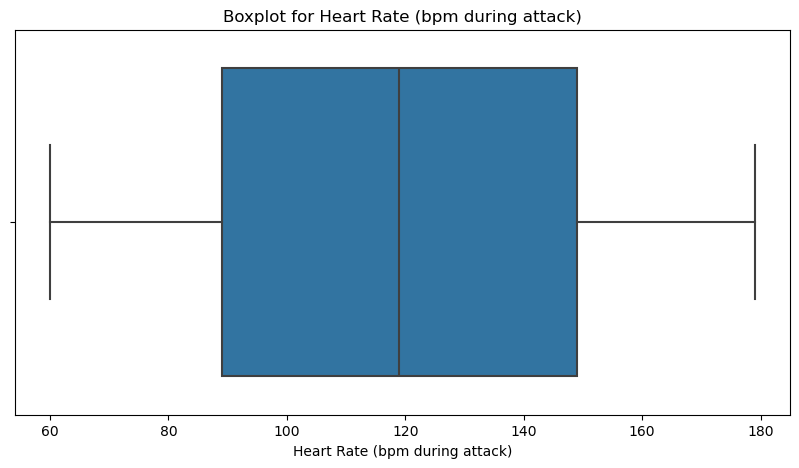

Number of outliers in 'Heart Rate (bpm during attack)': 0


In [253]:
# Boxplot for Heart Rate (bpm during attack)
plt.figure(figsize=(10, 5))
sns.boxplot(x=data["Heart Rate (bpm during attack)"])
plt.title("Boxplot for Heart Rate (bpm during attack)")
plt.show()

# Detect outliers using IQR
def detect_and_handle_outliers(column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Detect outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    print(f"Number of outliers in '{column}': {len(outliers)}")

    # Handle outliers by clipping
    data[column] = data[column].clip(lower_bound, upper_bound)


detect_and_handle_outliers("Heart Rate (bpm during attack)")

# Initialize scaler
scaler = StandardScaler()

# Normalize Heart Rate
data["Heart Rate (bpm during attack)"] = scaler.fit_transform(data[["Heart Rate (bpm during attack)"]])

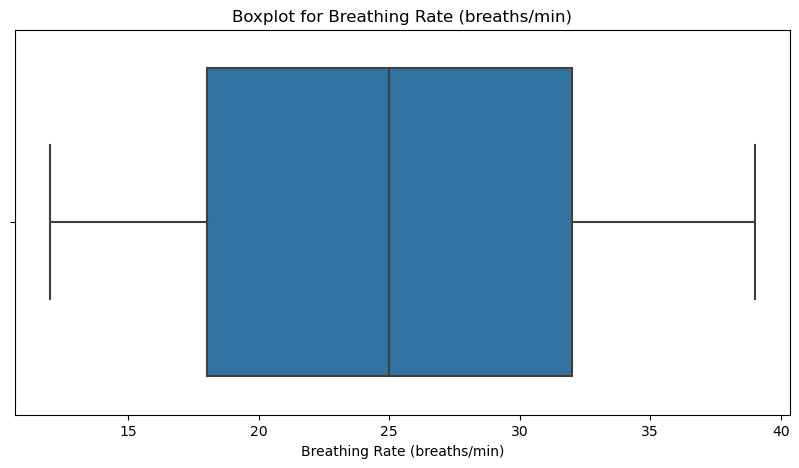

Number of outliers in 'Breathing Rate (breaths/min)': 0


In [255]:
# Boxplot for Breathing Rate (breaths/min)
plt.figure(figsize=(10, 5))
sns.boxplot(x=data["Breathing Rate (breaths/min)"])
plt.title("Boxplot for Breathing Rate (breaths/min)")
plt.show()

# Detect outliers using IQR
detect_and_handle_outliers("Breathing Rate (breaths/min)")

# Normalize Heart Rate
data["Breathing Rate (breaths/min)"] = scaler.fit_transform(data[["Breathing Rate (breaths/min)"]])

In [257]:
# Sweating Level (1-5) (Numerical variable)
# We check the distribution of the variable
print("The distribution of the Sweating Level (1-5) feature")
print(data["Sweating Level (1-5)"].describe())

# There are no outliers in the Sweating Level (1-5) feature since all values go from 1 to 10

# Check class imbalance
print("\n We check for class imbalance in the Diet Quality (1-10) feature")
print(data["Sweating Level (1-5)"].value_counts(normalize=True))
print("We can see that the classes are completely balanced")

# Normalize the variable
data["Sweating Level (1-5)"] = StandardScaler().fit_transform(data[["Sweating Level (1-5)"]])

The distribution of the Sweating Level (1-5) feature
count    12000.000000
mean         2.987417
std          1.414482
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: Sweating Level (1-5), dtype: float64

 We check for class imbalance in the Diet Quality (1-10) feature
Sweating Level (1-5)
1    0.202417
2    0.202083
4    0.199667
3    0.198500
5    0.197333
Name: proportion, dtype: float64
We can see that the classes are completely balanced


In [284]:
data = data.drop(data.columns[0:5], axis=1)
data

,Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm during attack),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,...,"Age_(18, 30]","Age_(30, 40]","Age_(40, 50]","Age_(50, 60]","Age_(60, 70]",Gender_Female,Gender_Male,Gender_Other,Norm Sleep hr,Norm Activity hrs/week
0,0,0,-0.504732,0.735564,0.931686,0.008896,0,0,-0.180884,1,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.942857,0.83
1,0,0,-0.849907,0.678102,-0.922375,1.422901,1,0,-1.576553,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.485714,0.73
2,0,0,-1.195082,-1.706595,1.055290,-1.405108,0,0,0.865867,1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.557143,0.10
3,0,1,0.185618,-0.729732,-0.798771,-1.405108,0,1,-0.180884,1,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.885714,0.37
4,0,1,0.530793,0.936683,-1.293187,0.715899,0,1,-1.576553,0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.885714,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,1,1,-1.540258,0.563176,-0.675167,-0.698106,1,0,0.865867,0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.200000,0.41
11996,0,1,-0.504732,0.879221,0.931686,-0.698106,0,0,-0.529802,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.985714,0.22
11997,1,0,-1.195082,-1.103238,0.931686,-0.698106,0,0,1.214784,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.971429,0.81
11998,0,0,1.221143,-0.844657,-1.416791,1.422901,0,0,-0.529802,0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.414286,0.66


## Data Split

In [292]:
train, test =train_test_split(
    data,
    test_size=0.2,
    random_state=0,
    shuffle=True,
    stratify=data['Severity of Anxiety Attack (1-10)']
)

train_X = train.drop(columns=['Severity of Anxiety Attack (1-10)'])
train_Y = train['Severity of Anxiety Attack (1-10)']
test_X = test.drop(columns=['Severity of Anxiety Attack (1-10)'])
test_Y = test['Severity of Anxiety Attack (1-10)']
